# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [1]:
import os
import geopandas as gpd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
import scipy.cluster as scp
from scipy.spatial.distance import cdist
%pylab inline
%run ~/choroplethNYC.py

Populating the interactive namespace from numpy and matplotlib
Usage: choroplathNYC <path to shapefile> <column>

Options:
  -h, --help            show this help message and exit
  -d, --discrete        discrete steps color bar
  -m CMAP, --cmap=CMAP  matplotlib colormap name
  -t TITLE, --title=TITLE
                        title of figure
  -o OUTPUT, --output=OUTPUT
                        output file  (must be pylab compatible extension, e.g.
                        pdf png etc
  --clobber             clobber output file
  --noshow              do not show figure (default)
  --debug               print debug statements


In [4]:
os.getenv("PUIDATA")

'/nfshome/cl4855/PUIdata'

In [26]:
!cd $PUIDATA && { curl -O https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp[00-14]totals.zip; cd -; }


[1/15]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp00totals.zip --> zbp00totals.zip
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp00totals.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55505    0 55505    0     0   179k      0 --:--:-- --:--:-- --:--:--  180k

[2/15]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp01totals.zip --> zbp01totals.zip
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp01totals.zip
100 55505    0 55505    0     0   253k      0 --:--:-- --:--:-- --:--:--  253k

[3/15]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp02totals.zip --> zbp02totals.zip
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp02totals.zip
100 55505    0 55505    0     0   275k      0 --:--:-- --:--:-- --:--:--  275k

[4/15]: https://git

In [44]:
!cd $PUIDATA && { curl -O https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp[94-99]totals.zip?raw=true; cd -; }


[1/6]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true --> zbp94totals.zip?raw=true
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   142    0   142    0     0    673      0 --:--:-- --:--:-- --:--:--   676

[2/6]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp95totals.zip?raw=true --> zbp95totals.zip?raw=true
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp95totals.zip?raw=true
100   142    0   142    0     0   2597      0 --:--:-- --:--:-- --:--:--  138k

[3/6]: https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp96totals.zip?raw=true --> zbp96totals.zip?raw=true
--_curl_--https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp96totals.zip?raw=true
100   142    0   142 

In [6]:
import pandas as pd

In [33]:
import zipfile 

In [42]:
!unzip $PUIDATA/zbp99totals.zip

Archive:  /nfshome/cl4855/PUIdata/zbp99totals.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /nfshome/cl4855/PUIdata/zbp99totals.zip or
        /nfshome/cl4855/PUIdata/zbp99totals.zip.zip, and cannot find /nfshome/cl4855/PUIdata/zbp99totals.zip.ZIP, period.


In [ ]:
df = pd.read_csv(zf.open(zbp99totals.zip.replace('.zip','.txt')))

In [46]:
import urllib

In [4]:
# years_to_use = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
#                '10', '11', '12', '13', '14']

In [118]:
years_to_use = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
               '10', '11', '12', '13', '14']
for i in range(len(years_to_use)):
    file_name = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp' + str(years_to_use[i]) + 'totals.zip?raw=true'
    urllib.request.urlretrieve(file_name, 'zipped.gz')
    os.system('unzip zipped.gz')
    os.system('mv ' + 'zbp' + str(years_to_use[i]) + 'totals.txt $PUIDATA')

In [7]:
df={}
for i in range(len(years_to_use)):
    df[str(years_to_use[i])]=pd.DataFrame(pd.read_csv(os.getenv("PUIDATA")+"/"+"zbp"+str(years_to_use[i])+"totals.txt"))
    df[str(years_to_use[i])].columns = map(str.lower, df[str(years_to_use[i])].columns)
    df[str(years_to_use[i])]=df[str(years_to_use[i])][['zip','est']]
    df[str(years_to_use[i])].rename(columns={'est':str(years_to_use[i])},inplace=True)

In [8]:
merged_df = pd.concat(df.values(), axis = 0)

In [9]:
merged_df.fillna(0, inplace = True)

In [10]:
final_df = merged_df.groupby('zip').sum().reset_index()

In [11]:
final_df.columns

Index(['zip', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '94', '95', '96', '97', '98', '99'],
      dtype='object')

In [12]:
final_df.head()

,zip,00,01,02,03,04,05,06,07,08,...,11,12,13,14,94,95,96,97,98,99
0,501,1.0,6.0,11.0,7.0,8.0,2.0,8.0,5.0,3.0,...,2.0,2.0,2.0,4.0,0.0,2.0,4.0,4.0,3.0,2.0
1,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,11.0,8.0,0.0,0.0
2,1001,493.0,490.0,490.0,505.0,500.0,509.0,509.0,503.0,477.0,...,436.0,453.0,439.0,458.0,439.0,439.0,433.0,457.0,444.0,469.0
3,1002,563.0,587.0,566.0,586.0,584.0,589.0,582.0,596.0,584.0,...,558.0,572.0,572.0,560.0,450.0,467.0,487.0,500.0,490.0,558.0
4,1003,13.0,13.0,15.0,16.0,15.0,12.0,12.0,16.0,17.0,...,16.0,15.0,15.0,18.0,10.0,10.0,13.0,15.0,14.0,13.0


In [13]:
cols = ['zip','94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
               '10', '11', '12', '13', '14']

In [14]:
df = final_df.reindex(columns= cols)

In [15]:
zipcode = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + "ZIP_CODE_040114.shp")

In [16]:
zipcode=zipcode[['ZIPCODE','geometry']]

In [17]:
zipcode.rename(columns={'ZIPCODE':'zip'},inplace=True)

In [18]:
zipcode.head()

,zip,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [19]:
df.head()

,zip,94,95,96,97,98,99,00,01,02,...,05,06,07,08,09,10,11,12,13,14
0,501,0.0,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1,1000,0.0,4.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
3,1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
4,1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0


In [20]:
zipcode['zip']=zipcode['zip'].astype(str)
df['zip']=df['zip'].astype(str)

In [21]:
df1=zipcode.merge(df,on="zip")

In [22]:
df1.head()

,zip,geometry,94,95,96,97,98,99,00,01,...,05,06,07,08,09,10,11,12,13,14
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [23]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [24]:
cleancsb=df1.drop(['zip', 'geometry'], axis=1)

In [25]:
cleancsb.head()

,94,95,96,97,98,99,00,01,02,03,...,05,06,07,08,09,10,11,12,13,14
0,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [26]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T


In [27]:
vals.head()

,94,95,96,97,98,99,00,01,02,03,...,05,06,07,08,09,10,11,12,13,14
0,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.292900,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853
1,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,-0.058923,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875
2,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.092169,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464
3,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,-0.057531,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007
4,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.120649,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331


In [28]:
vals.mean(axis=1)

0     -3.595008e-16
1     -1.268826e-16
2      4.652363e-16
3     -1.903239e-16
4     -2.537653e-16
5      7.084280e-16
6     -2.008975e-16
7     -3.912214e-16
8      2.537653e-16
9      4.863834e-16
10     4.229421e-17
11    -1.448577e-15
12     6.026925e-16
13     8.141636e-16
14     1.903239e-16
15     1.903239e-16
16    -5.286776e-17
17    -1.173664e-15
18    -1.173664e-15
19    -1.173664e-15
20     3.595008e-16
21     1.163091e-16
22     6.132661e-16
23     1.480297e-16
24    -5.921189e-16
25    -6.132661e-16
26    -4.335157e-16
27     5.709718e-16
28    -7.612958e-16
29    -2.003688e-15
           ...     
230    2.326182e-16
231    4.229421e-16
232   -3.119198e-16
233   -1.586033e-16
234    2.326182e-16
235    1.797504e-16
236   -6.132661e-16
237    1.586033e-17
238    4.229421e-17
239    0.000000e+00
240    5.815454e-17
241    5.815454e-17
242    1.057355e-17
243    5.286776e-17
244    0.000000e+00
245    7.401487e-17
246    7.401487e-17
247   -7.930164e-17
248    4.229421e-17


In [29]:
vals.mean(axis=1).shape

(260,)

In [30]:
vals.std(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
230    1.0
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
236    1.0
237    1.0
238    1.0
239    1.0
240    1.0
241    1.0
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
250    1.0
251    1.0
252    1.0
253    1.0
254    1.0
255    1.0
256    1.0
257    1.0
258    1.0
259    1.0
dtype: float64

In [31]:
vals.std(axis=1).shape

(260,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [46]:
distortions = []
for nc in range(1,10):
    km = KMeans(n_clusters=nc,random_state=444).fit(vals)
    km.fit(vals)
    distortions.append(sum(np.min(cdist(vals, km.cluster_centers_, 'euclidean'), axis=1)) / vals.shape[0])

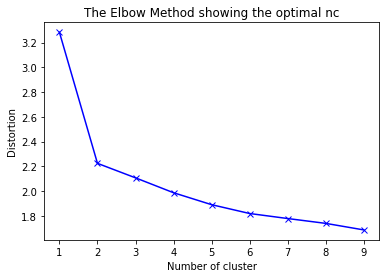

In [47]:
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal nc')
plt.show()

Figure 1: Based on the elbow method the number of cluster is 2. But since any choosing method of number of cluster is arbitrary. So I still choose 5 as the cluster number.

In [50]:
#cluster with kmeans
nc=5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [51]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(260,)

### The map of the clusters may look something like this

In [52]:
kmlabel=pd.DataFrame(km.labels_)

In [53]:
nycloca=df1[['zip','geometry']]

In [54]:
nycmap=nycloca.join(kmlabel, how='outer')

(<matplotlib.figure.Figure at 0x7fc885d08438>,
 <matplotlib.colorbar.Colorbar at 0x7fc885c5c898>)

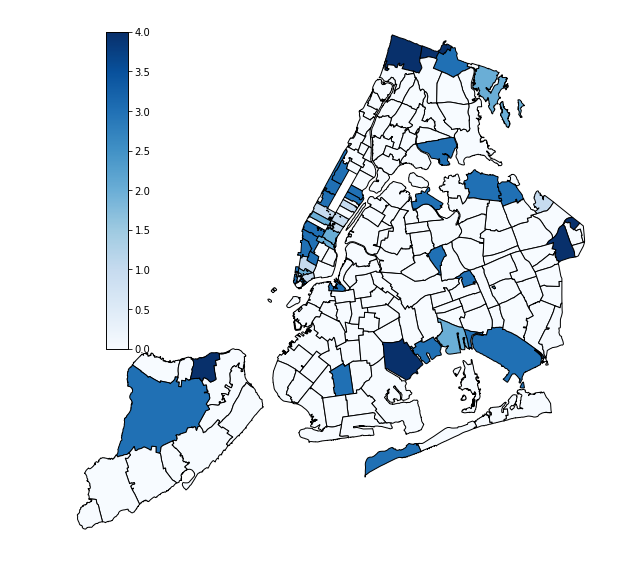

In [56]:
choroplethNYC(nycmap,column=0,edgecolor='black',cmap="Blues")

Figure 2: cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

In [69]:
tsplot=kmlabel.join(vals, how='outer')

In [71]:
tsplot.rename(columns={0:'cluster_n'},inplace=True)

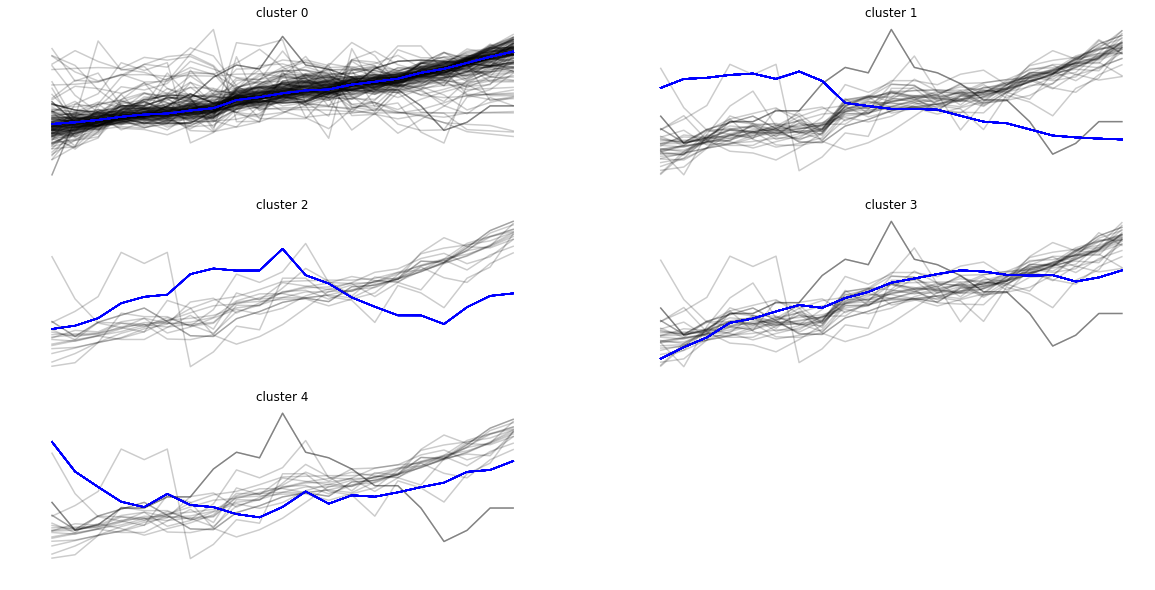

In [88]:
fig = pl.figure(figsize=(20,10))
for i in range(5):
    plotts = (tsplot[tsplot['cluster_n'] == i]).reset_index()
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title('cluster %s'%i)
    for j in list(plotts.index):
        ax.plot(range(21), vals.iloc[j], 'k-', alpha=0.2)
        pl.plot(range(21), km.cluster_centers_[i], 'b-', label='center of cluster %s'%i)
        ax.set_axis_off()

Figure 3: Time series of each cluster.


### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

In [135]:
af = AffinityPropagation(preference=-100).fit(vals)

In [136]:
aflabel=pd.DataFrame(af.labels_)

In [137]:
nycmap1=nycloca.join(aflabel, how='outer')

(<matplotlib.figure.Figure at 0x7fc885d9b748>,
 <matplotlib.colorbar.Colorbar at 0x7fc883ed4898>)

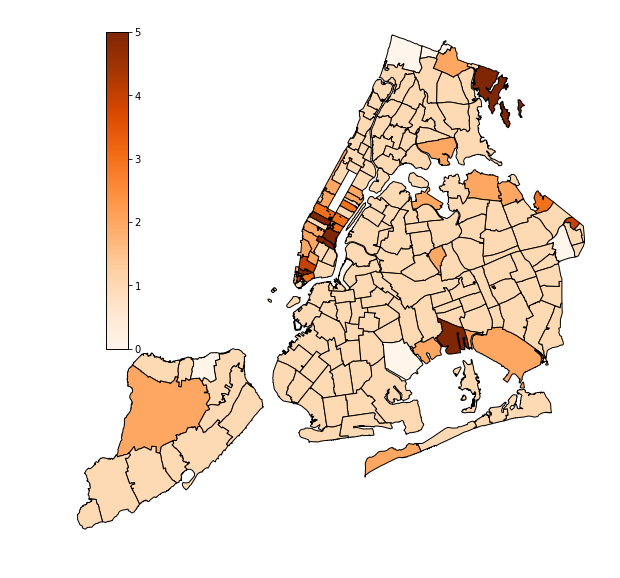

In [138]:
choroplethNYC(nycmap1,column=0,edgecolor='black',cmap="Oranges")

Figure 4: cloropleth of  cluster centers for 5 affinity propagation clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

In [139]:
tsplot1=aflabel.join(vals, how='outer')

In [140]:
tsplot1.rename(columns={0:'cluster_n'},inplace=True)

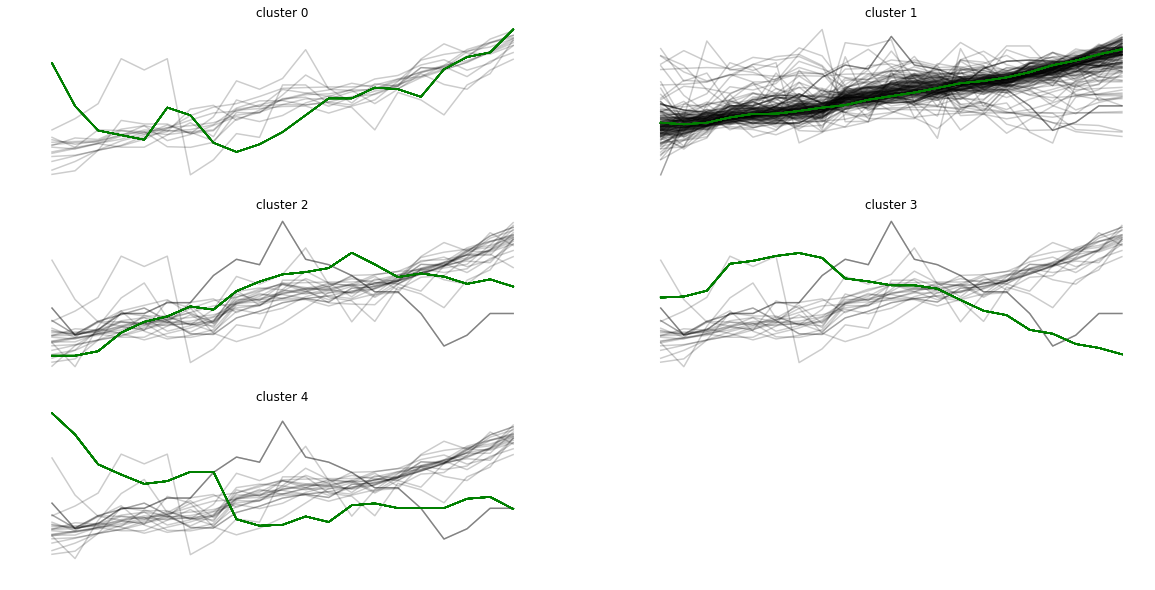

In [141]:
fig = pl.figure(figsize=(20,10))
for i in range(5):
    plotts = (tsplot1[tsplot1['cluster_n'] == i]).reset_index()
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title('cluster %s'%i)
    for j in list(plotts.index):
        ax.plot(range(21), vals.iloc[j], 'k-', alpha=0.2)
        pl.plot(range(21), af.cluster_centers_[i], 'g-', label='center of cluster %s'%i)
        ax.set_axis_off()

Figure 5: Time series of each cluster.

## Different Cluster mehthod Compare
The two clusters both show there are more business in lower mahattan and which makes sense. The general cluster trend is also kind of similar. However, in upper mahattan and some other neighborhood while k-means cluster indicates there are many companies, the affinity propagation cluster showing a few of them.

# If you want to use agglomerative clustering

In [129]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

In [130]:
labelsag1=pd.DataFrame(labelsag)

In [131]:
nycmap2=nycloca.join(labelsag1, how='outer')

(<matplotlib.figure.Figure at 0x7fc883b713c8>,
 <matplotlib.colorbar.Colorbar at 0x7fc883f5e278>)

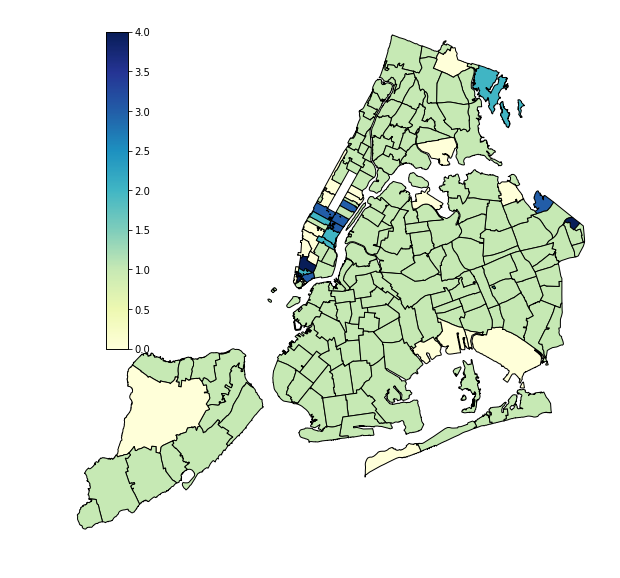

In [132]:
choroplethNYC(nycmap1,column=0,edgecolor='black',cmap="YlGnBu")

Figure 6: For hierarchical agglomerative clustering in 5 clusters, with smoothed time series

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [133]:
dan=scp.hierarchy.linkage(vals, method='ward')

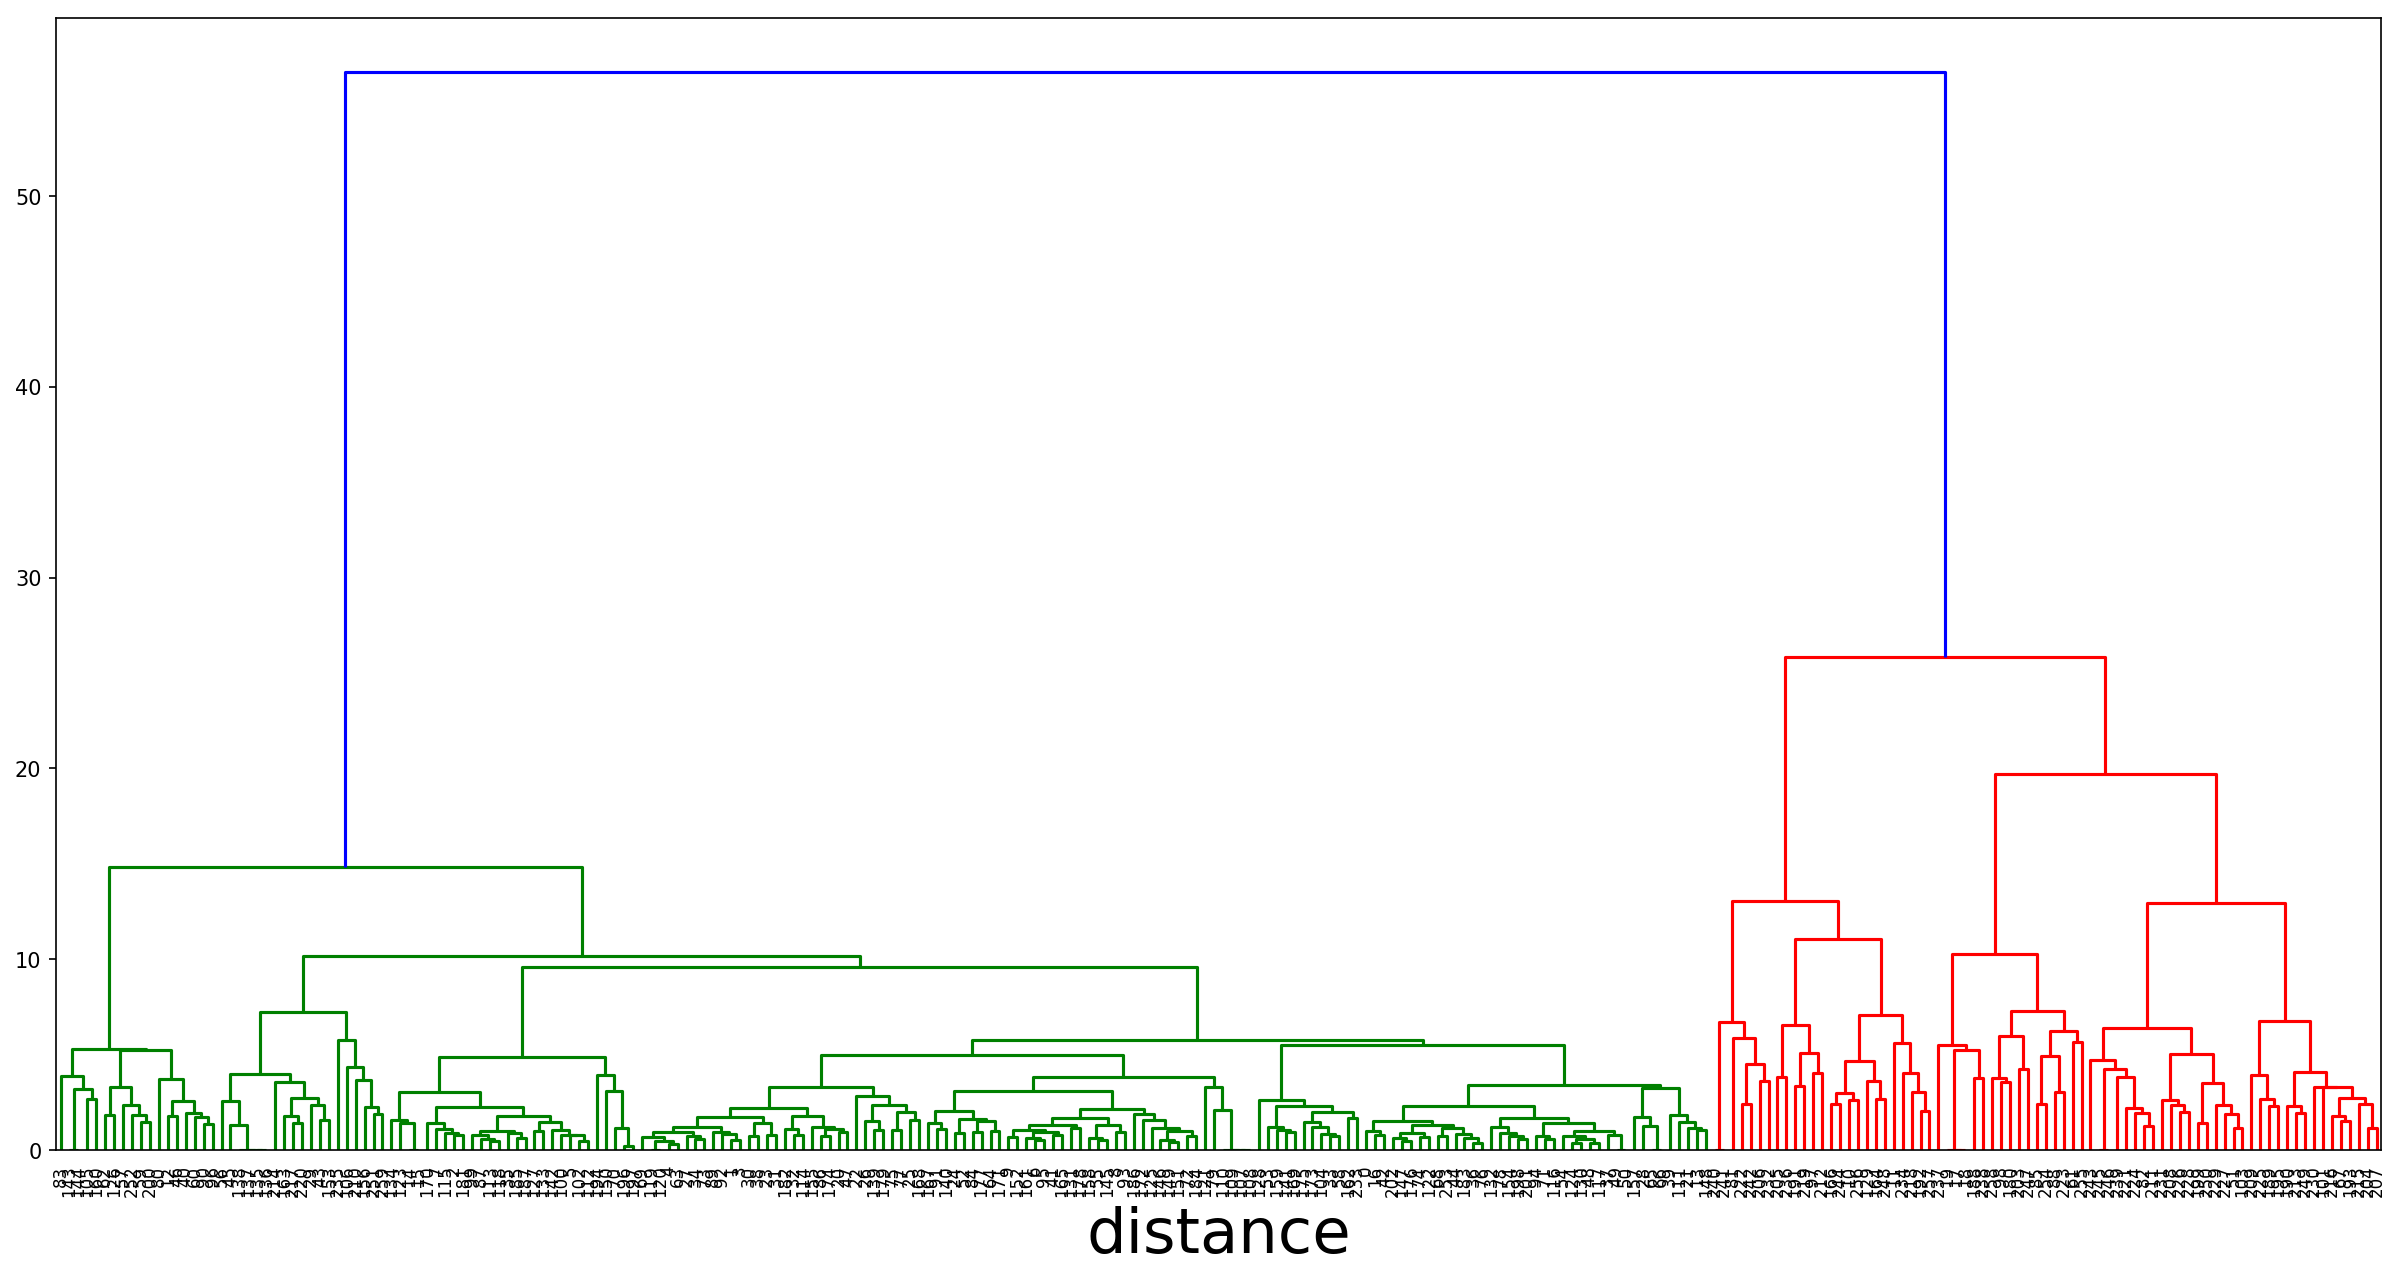

In [134]:
fig = pl.figure(figsize=(20,10), dpi=150)
pl.xlabel("distance",fontsize=30)
ddg=scp.hierarchy.dendrogram(dan,leaf_rotation=90., leaf_font_size=8.)

Figure 7: Dandrogramuse after using hierarchical clustering in scipy.

In [291]:
!pwd

/nfshome/cl4855/PUI2018_cl4855/HW12_cl4855
